<a href="https://colab.research.google.com/github/JoaquimTarin/Thesis-ML-Statistical-Physics/blob/main/KerasTest1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q seaborn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.11.0


In [83]:
N_data = 5000
x = np.linspace(0.0, 10*np.pi, N_data)
noise = np.random.uniform(-0.2,0.2, N_data)
y = np.sin(x) + noise

In [88]:
dataset = {'x': x,'Noisy sin(x)': y}
df = pd.DataFrame(dataset)

In [89]:
train_ds = df.sample(frac=0.8, random_state=0)
test_ds = df.drop(train_ds.index) #here the .index prevents the keys from being dropped

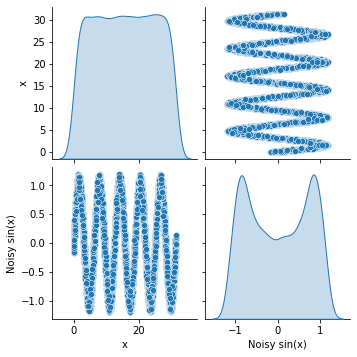

In [ ]:
sns.pairplot(train_ds[['x', 'Noisy sin(x)']], diag_kind='kde')

In [90]:
train_features = train_ds.copy()
test_features = test_ds.copy()

train_labels = train_features.pop('Noisy sin(x)')
test_labels = test_features.pop('Noisy sin(x)')

In [91]:
normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[15.724]]


In [67]:
def model_builder(normalizer):
  model = tf.keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                loss='mean_absolute_error')

  return model

In [92]:
sin_model = model_builder(normalizer)

In [93]:
%%time
history = sin_model.fit(
    train_features, train_labels,
    validation_split=0.2, verbose=0, epochs=200
)

CPU times: user 50.1 s, sys: 2.27 s, total: 52.4 s
Wall time: 48.3 s


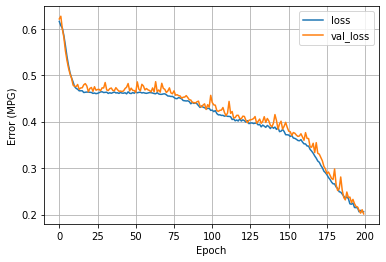

In [94]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0,0.2])
  plt.xlabel('Epoch')
  plt.ylabel('Error (MPG)')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [95]:
f_x = sin_model.predict(x)

157/157 [==============================] - 0s 1ms/step


In [96]:
def plot_plot(x,y):
  plt.scatter(train_features, train_labels, label='Data')
  plt.plot(x,y, color='k', label='Predictions')
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.legend()

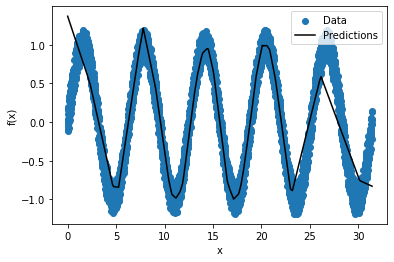

In [97]:
plot_plot(x,f_x)

In [99]:
N_data = 1000
a = np.linspace(-np.pi, np.pi, N_data)
noise = np.random.normal(0,0.2, N_data)
b = np.e**(-a)*np.cos(4*a) + noise

dataset_2 = {'x': a,'Noisy function': b}
df_2 = pd.DataFrame(dataset_2)

train_ds_2 = df_2.sample(frac=0.8, random_state=0)
test_ds_2 = df_2.drop(train_ds_2.index)

train_features_2 = train_ds_2.copy()
test_features_2 = test_ds_2.copy()

train_labels_2 = train_features_2.pop('Noisy function')
test_labels_2 = test_features_2.pop('Noisy function')

normalizer_2 = tf.keras.layers.Normalization(input_shape=[1,], axis=-1)
normalizer_2.adapt(np.array(train_features_2))

function_model = model_builder(normalizer_2)

In [100]:
%%time
history = function_model.fit(
    train_features_2, train_labels_2,
    validation_split=0.2, verbose=0, epochs=200
)

CPU times: user 15.4 s, sys: 574 ms, total: 16 s
Wall time: 21.7 s


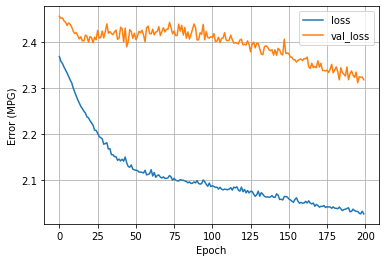

In [101]:
plot_loss(history)

In [102]:
def plot_plot_2(x,y):
  plt.scatter(train_features_2, train_labels_2, label='Data')
  plt.plot(a,b, color='k', label='Predictions')
  plt.xlabel('x')
  plt.ylabel('g(x)')
  plt.legend()

32/32 [==============================] - 0s 1ms/step


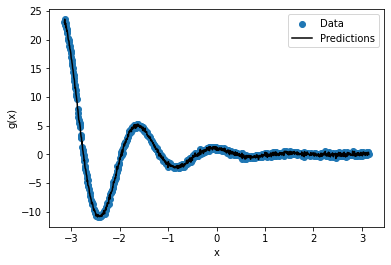

In [103]:
g_x = function_model.predict(a)
plot_plot_2(a,g_x)